# Brownian Motion


> Important properties of brownian motion is that it is a martingale (Markov process)and that it
accumulates quadratic variation at rate one per unit time.
Note:Quadratic Variation is perhaps what makes Stochastic Calculus so different from Ordinary
Calculus.

Brownian Motion
A Brownian motion is a stochastic process ${W_t}\in[0,7]$
Filtered probability space $\left(\Omega, \mathcal{F}, \mathbb{P},\left\{\mathcal{F}_t\right\}_{t \in[0, T]}\right)$


W : [0,T]× Q → R
1. $W_0$= 0
2. $W$ has independent increments
3. $W$ has Gaussian (normal) increments
4. $W$ has continuous sample paths(almost surely).

## Simple Random Walk


Picture you have successive coin tosses, $\omega=\omega_1 \omega_2 \omega_3 \ldots$ Where $\omega_n$ is the outcome of the $n^{\text {th }}$ toss.
$$
X_j= \begin{cases}1 & \text { if } \omega_j=\boldsymbol{H} \\ -1 & \text { if } \omega_j=T\end{cases}
$$
If we define $M_0=0$,
$$
M_k=\sum_{j=1}^k X_j
$$


In [7]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# DARK Monokai Theme for jupyter notebook
###################################################################################################
# from jupyterthemes import get_themes
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('monokai')
# ####################################################################################################

In [8]:
# Parameters
M = 10 # number of simulations
t = 10 # Time `t` 

In [23]:
random_walk=[-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

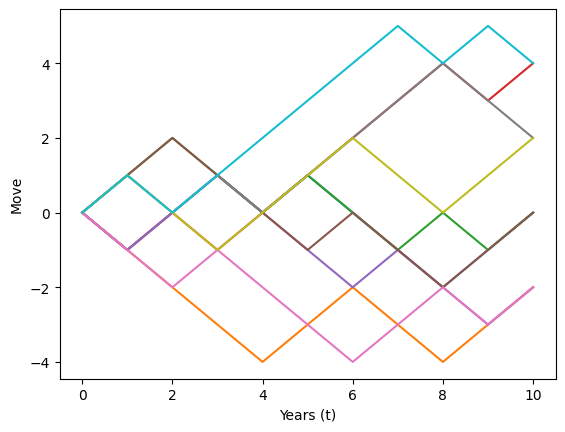

In [24]:


plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

image.png

### Properties of Random Walk


![](2022-09-23-22-43-49.png)

![](2022-09-23-22-45-34.png)